# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [1]:
import numpy as np
# Alfabet jawny i szyfrowy 
alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
alphabet_size = len(alphabet)
np.random.seed(4273)

In [2]:
def cesar(plaintext, key, show_prints):
    ciphertext = ""

    if show_prints: print("Tekst jawny: ", plaintext)

    for text in plaintext.lower().split():
        for char in text:
            ciphertext = ciphertext + alphabet[(alphabet.index(char) + key) % alphabet_size] 
    if show_prints: print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    decodedtext = ""
    for text in ciphertext:
        for char in text:
            decodedtext = decodedtext + alphabet[(alphabet.index(char)- key) % alphabet_size]
    if show_prints: print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")
        
    return ciphertext

cesar("Zorro fly zealotry zipper", key=15, show_prints=True);

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szufrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [3]:
# lepszy Cezar
import numpy as np

def cesar_improved(plaintext, show_prints):
    if show_prints: print("Tekst jawny: ", plaintext)
    keys = np.random.permutation(np.arange(0, alphabet_size-1, dtype=int))

    i = 0
    ciphertext = ""
    for text in plaintext.lower().split():
        for char in text:
            ciphertext = ciphertext + alphabet[(alphabet.index(char) + keys[i%(alphabet_size-1)]) % alphabet_size]
            i += 1
    if show_prints: print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    i = 0
    decodedtext = ""
    for text in ciphertext:
        for char in text:
            decodedtext = decodedtext + alphabet[(alphabet.index(char)- keys[i%(alphabet_size-1)]) % alphabet_size]
            i += 1
    if show_prints: print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")
    
    return ciphertext
    
cesar_improved("Zorro fly zealotry zipper", show_prints=True);

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  wvfgbplkravoevxphbyacl (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

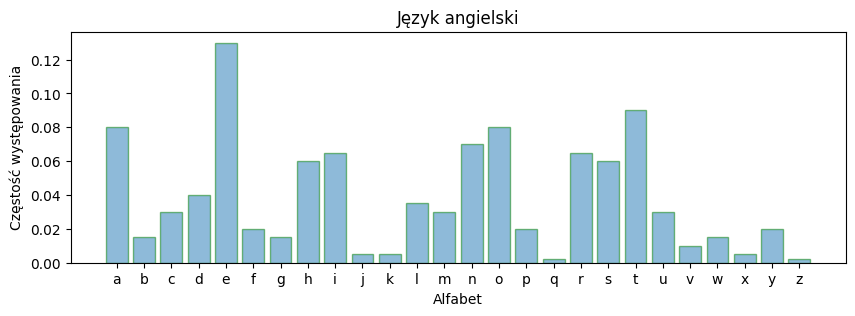

In [4]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(10,3))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

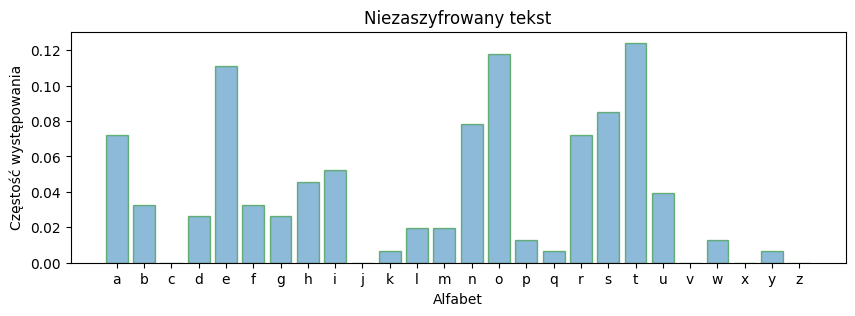

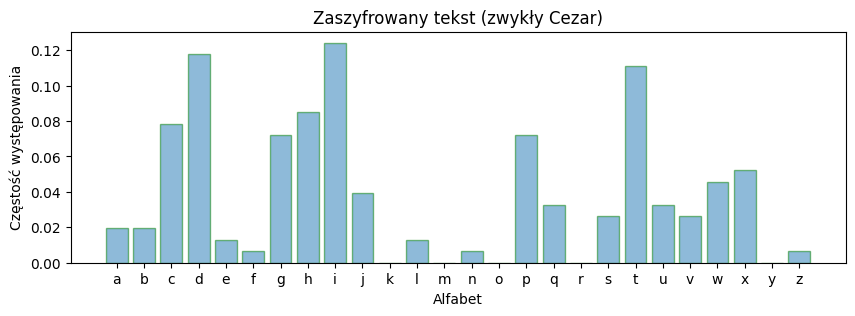

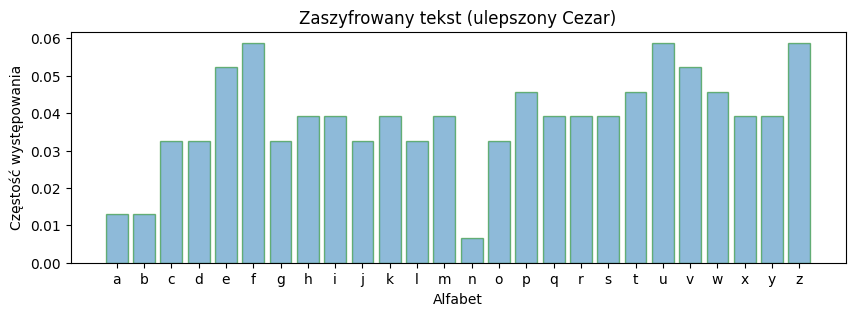

In [5]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

# policz częstość i wyświetl rozkłady
def plot_chars_freq(s, title):
    alphabet_size = len(alphabet)
    s = s.lower()
    unique, counts = np.unique(list(s), return_counts=True)
    frequencies = counts / len(s)
    full_frequencies = [0]*alphabet_size
    for i in range(len(frequencies)):
        full_frequencies[alphabet.index(unique[i])] = frequencies[i]
    labels = np.arange(len(letters))
    plt.figure(figsize=(10,3))
    plt.bar(labels, full_frequencies, alpha=0.5, edgecolor="green")
    plt.xlabel('Alfabet')
    plt.xticks(np.arange(alphabet_size), alphabet)
    plt.title(title)
    plt.ylabel('Częstość występowania')
    plt.show()
    
plot_chars_freq(plaintext, title='Niezaszyfrowany tekst')
plot_chars_freq(cesar(plaintext, key=15, show_prints=False), title='Zaszyfrowany tekst (zwykły Cezar)')
plot_chars_freq(cesar_improved(plaintext, show_prints=False), title='Zaszyfrowany tekst (ulepszony Cezar)')

### Ciekawostka: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [6]:
!pip install nltk 
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / (float)(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

You should consider upgrading via the 'C:\Users\przemek\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\przemek\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt
Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

### Zadanie samodzielne dla studentów
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_
2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera


Tekst jawny:  TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem
Szyfrogram:  dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


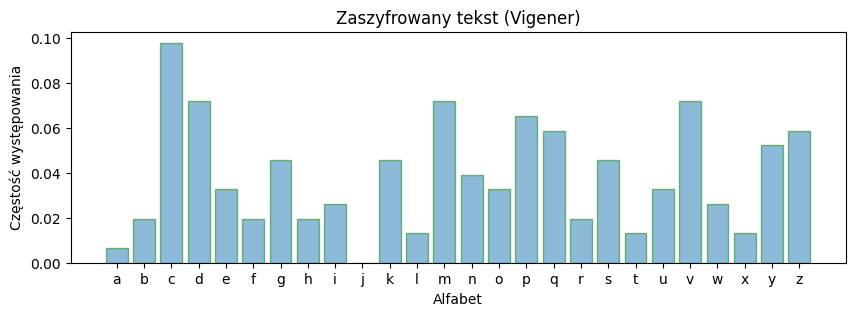

In [7]:
def vigener(plaintext, key, show_prints):
    ciphertext = ""
    key_len = len(key)

    if show_prints: print("Tekst jawny: ", plaintext)

    i = 0
    for text in plaintext.lower().split():
        for char in text:
            ciphertext = ciphertext + alphabet[(alphabet.index(char) + alphabet.index(key[i%key_len])) % alphabet_size] 
            i += 1
    if show_prints: print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    i = 0
    decodedtext = ""
    for text in ciphertext:
        for char in text:
            decodedtext = decodedtext + alphabet[(alphabet.index(char) - alphabet.index(key[i%key_len])) % alphabet_size] 
            i += 1
    if show_prints: print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")
        
    return ciphertext

vigener("TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem",
       key="klucz",
       show_prints=True);
plot_chars_freq(vigener(plaintext, key="klucz", show_prints=False), title='Zaszyfrowany tekst (Vigener)')

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 